Q1. Classify the MNIST image dataset using deep convolution neural networks. Identify the optimal number of convolution layers and report a graph by varying the number of convolution layers (1 to 5) against accuracy. Use Fully connected layer: You can use 1 to 3 numbers of the fully connected layer and examine the changes in accuracy. For classification, you are allowed to use the softmax classification layer. Implement the 50% dropout technique in your fully-connected layer. Give some optimal mini-batch size and learning rate. Save your trained model

## Loading the MNIST Dataset and plotting one graph

3


(60000, 28, 28)

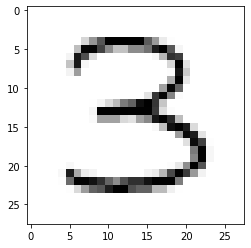

In [ ]:
# Downloading mnist dataset and plotting the graph
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 7778 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 3
plt.imshow(x_train[image_index], cmap='Greys')
x_train.shape

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## Building Convolution Neural Network

In [ ]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.5))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
# fitting the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4995 - accuracy: 0.8426
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1552 - accuracy: 0.9537
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1125 - accuracy: 0.9653
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0912 - accuracy: 0.9712
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0785 - accuracy: 0.9751
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0681 - accuracy: 0.9785
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0620 - accuracy: 0.9802
Epoch 8/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0583 - accuracy: 0.9806
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0505 - accuracy: 0.9835
Epoch 10/10
1875/1875 [==============================] - 28s 15m

##Evaluating the model

313/313 [==============================] - 2s 6ms/step - loss: 0.0539 - accuracy: 0.9837
3


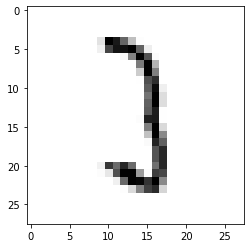

In [ ]:
model.evaluate(x_test, y_test)
image_index = 4443
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())